In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Steps to investigate Titanic Problem
1. Exploratory Data Analysis (EDA)
   - Visualizing the data to understand patterns and relationships
   - Identifying correlations between features
1. Feature Engineering
   - Creating new features from existing ones
   - Encoding categorical variables
   - Handling missing values
1. Model Selection
   - Choosing appropriate machine learning models for classification
   - Comparing different models using cross-validation
1. Model Training
   - Training models on the training dataset
   - Tuning hyperparameters
1. Model Evaluation
   - Evaluating model performance on a validation set
   - Using metrics like accuracy, precision, recall, and F1 score
1. Model Improvement
   - Applying techniques like ensemble methods or feature selection to improve model performance
1. Final Model Testing
   - Testing the final model on the test dataset to estimate real-world performance
1. Conclusion and Interpretation
    - Summarizing findings
    - Discussing the implications of the model results
    - Suggesting next steps for further research or application

In [64]:
data_path = "/kaggle/input/titanic/"
data_path = "data/"

In [65]:
def println(s="=", n=100):
    print("="*n)

In [66]:
train_df = pd.read_csv(os.path.join(data_path, "train.csv"))

display(train_df.info())
println()

display(train_df.describe())
println()

display(train_df.head())
println()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
# fill missing values
# fill missing age with median
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

# fill missing carbin with "U" for unknown
# train_df["Cabin"].fillna("U", inplace=True)

# fill missing embarked with "S" for unknown
train_df["Embarked"].fillna("S", inplace=True)


In [68]:
df_num = train_df[["Age", "SibSp", "Parch", "Fare", "Survived"]]
df_cat = train_df[["Name", "Sex", "Ticket", "Cabin", "Embarked", "Pclass", "Survived"]]

In [69]:
df_num_survived = df_num[df_num["Survived"] == 1]
df_num_not_survived = df_num[df_num["Survived"] == 0]

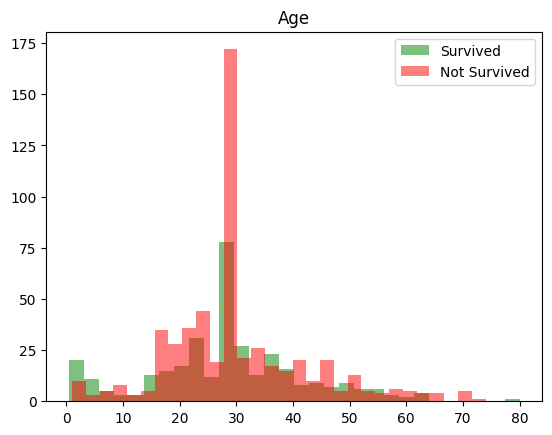

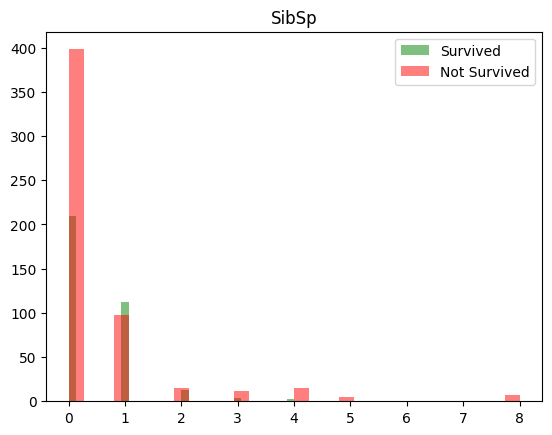

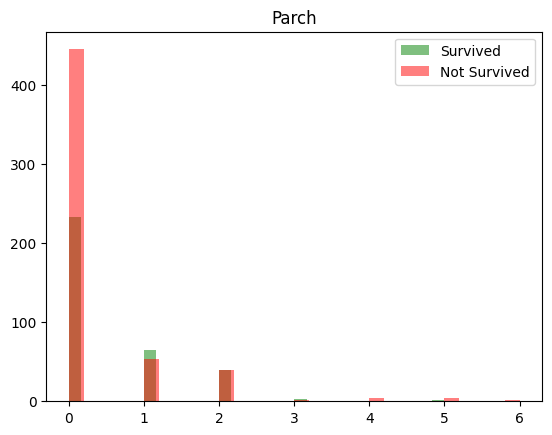

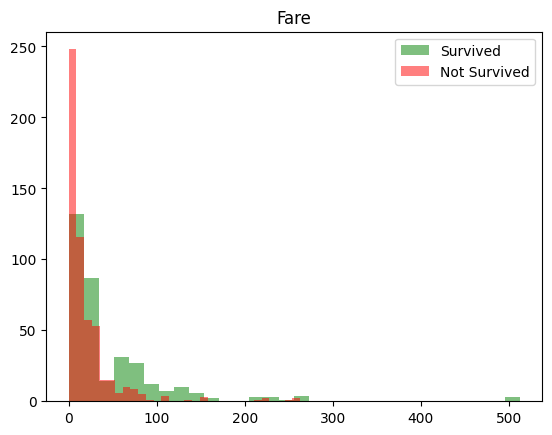

In [70]:
for num_col in df_num.columns:
    if num_col == "Survived":
        continue
    plt.hist(df_num_survived[num_col], alpha=0.5, label="Survived", bins=30, color="green")
    plt.hist(df_num_not_survived[num_col], alpha=0.5, label="Not Survived", bins=30, color="red")
    plt.legend()
    plt.title(num_col)
    plt.show()

In [71]:
def cat_plotbar(df_cat):
    for cat_col in df_cat.columns:
        if cat_col in ["Survived", "Name", "Ticket"]:
            continue
        
        # Calculate value counts for survived and not survived
        survived_counts = df_cat[df_cat['Survived'] == 1][cat_col].value_counts()
        not_survived_counts = df_cat[df_cat['Survived'] == 0][cat_col].value_counts()
        
        # Prepare data for plotting
        categories = sorted(set(survived_counts.index).union(set(not_survived_counts.index)))
        survived_values = [survived_counts.get(category, 0) for category in categories]
        not_survived_values = [not_survived_counts.get(category, 0) for category in categories]
        
        # Create figure with secondary y-axis
        fig = go.Figure()
        
        # Add bars for survived
        fig.add_trace(go.Bar(x=categories, y=survived_values, name='Survived', marker_color='green'))
        
        # Add bars for not survived
        fig.add_trace(go.Bar(x=categories, y=not_survived_values, name='Not Survived', marker_color='red'))
        
        # Update layout
        fig.update_layout(
            title_text=f'Distribution of {cat_col} - Survived vs Not Survived',
            barmode='group',
            xaxis_title=cat_col,
            yaxis_title='Count',
            legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)
        )
        
        # Show figure
        fig.show()
cat_plotbar(df_cat)

In [72]:
# try to find take the first letter of the cabin
cabin_df = train_df[["Cabin", "Survived"]]
cabin_df["Cabin"] = cabin_df["Cabin"].apply(lambda x: x[0] if pd.notnull(x) else "N/A")

# plot cabin distribution again
cat_plotbar(cabin_df)

C:\Users\User\AppData\Local\Temp\ipykernel_12080\2404861726.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

